# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [3]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

In [5]:
# all_molecules

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

To implement Linear Regression we need to find the Weights of the features. We use gradient descent technique to predict the weights.The Formula to calculate weight matrix is W(t+1)=W(t)-l*j'(W(t)) where l is the learning rate.Our aim is to determine a weight matrix such that the error is minimum.<br>
We start of by taking the weight_matrix of zeros. We then make the prediction using the current weight matrix and calculate the error between predicted and actual value. Then we update our weight matrix according to the above formula the updation of the matrix is done for number of iterations(in my case I have used 500).<br>
The procedure mentioned in above paragraph is done for different learning rates and we choose the learning rate for which we get the least Mean Square Error and we output that particular learning rate.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

In [6]:
# implement Linear Regression

In [7]:
def calcError(pred,actual):
    s=0
    for i in range(len(pred)):
        s=s+((pred[i]-actual[i])**2)
    return s/len(pred)

In [8]:
def make_pred(weight_mat):
    pred_list=[]
    for var_list in x_test:
        val=weight_mat[0]+weight_mat[1]*var_list[0]+weight_mat[2]*var_list[1]+weight_mat[3]*var_list[2]+weight_mat[4]*var_list[3]
        pred_list.append(val)
    return pred_list

In [9]:
def my_linear_regression(x,y,w,l,epochs):
    n=y.shape[0]
    for i in range(epochs):
        prediction=np.dot(x,w)
        error=prediction-y
        w=w-(l*(1/n) * np.dot(x.T, error))
    return w

In [10]:
def make_graph(xpoints,ypoints):
    plt.plot(xpoints,ypoints, marker = 'o')
    plt.show()

In [11]:
homo_x_train=np.hstack((np.ones((len(x_train),1)), x_train))
homo_y_train = np.reshape(y_train, (len(y_train),1))

In [12]:
# homo_x_train.shape

In [13]:
# homo_y_train.shape

In [14]:
# type(homo_x_train)

In [15]:
W_matrix = np.zeros((homo_x_train.shape[1], 1))

In [16]:
# W_matrix.shape

In [17]:
learning_rate = [0.01,0.02,0.1,0.2,0.5,0.8]
num_epochs = 500

In [18]:
# A_matrix = np.matrix(homo_x_train)
# A_trans_matrix=np.transpose(A_matrix)
# Y_matrix=np.transpose(np.matrix(y_train))
# Inter_inverse_matrix=np.linalg.inv(np.dot(A_trans_matrix,A_matrix))
# W_matrix=np.dot(Inter_inverse_matrix,np.dot(A_trans_matrix,Y_matrix))

In [19]:
error_val_list=[]
curr_error=999999
final_weight=[]
best_learning_rate=0
for alpha in learning_rate:
    weight= my_linear_regression(homo_x_train, homo_y_train, W_matrix, alpha, num_epochs)
    err_val=calcError(make_pred(weight),y_test)[0]
    if(err_val<curr_error):
        curr_error=err_val
        final_weight=weight
        best_learning_rate=alpha
    error_val_list.append(err_val)


In [20]:
error_val_list

[0.050294310941296126,
 0.02605937175511507,
 0.005409132263010355,
 0.004286224858488081,
 0.004119938936322267,
 0.00411846513107554]

In [21]:
# learning_rate

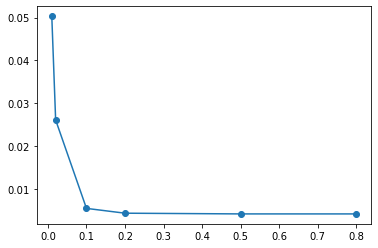

In [22]:
make_graph(learning_rate,error_val_list)

In [23]:
y_pred=[]
for var_list in x_test:
    val=final_weight[0]+final_weight[1]*var_list[0]+final_weight[2]*var_list[1]+final_weight[3]*var_list[2]+final_weight[4]*var_list[3]
    y_pred.append(val)


In [24]:
calcError(y_pred,y_test)

array([0.00411847])

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [25]:
best_learning_rate

0.8

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

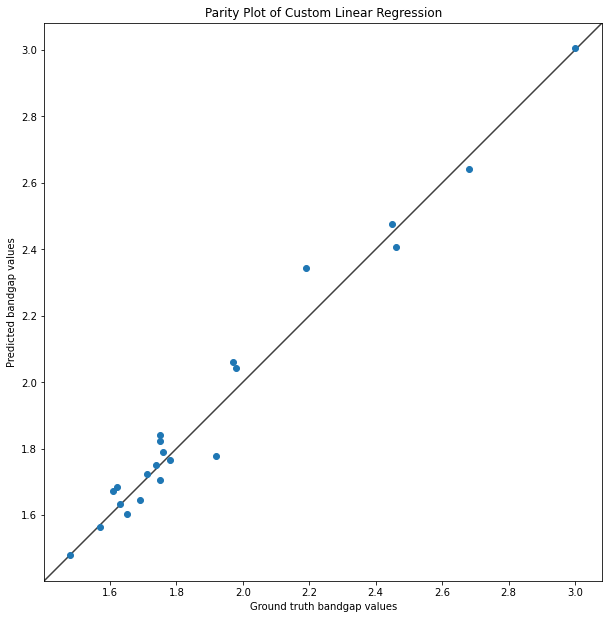

In [26]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression

<b>2.2.1 Explain Ridge regression briefly in 1-2 lines.<br></b>
Ridge Regression is a L2 norm ‘regularization’ technique that work by adding penalty equivalent to square of the magnitude of coefficients(features) along with minimizing the error between predicted and actual observations.

<b>2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)</b><br>
`alpha` provides a trade-off between balancing RSS and magnitude of coefficients. Basically it tries to give priority to features which have higher influence in predicting the result.<br>
From the table tabulated below, we can see that as the value of alpha increases the error increases. Though the usage of aplha is to reduce the overfitting and regularise the curve but significant high values of alpha may cause underfitting(Larger values specify stronger regularization) and that is the main reason why error keeps on increasing after particular value of alpha. The complexity of the model reduces as the value of alpha increases, so the value of alpha needs to be chosen wisely.

In [27]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [28]:
# you should not have imported sklearn before this point
from sklearn import linear_model
param_list=[0.00001,0.001,0.1,0.5,1,5,10,50]
error_ridge=[]
for curr_rate in param_list:
    pred_ridge=[]
    clf = linear_model.Ridge(alpha=curr_rate)
    clf.fit(x_train,y_train)
    pred_ridge=clf.predict(x_test)
    error_ridge.append(rmse(pred_ridge,y_test))
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

In [29]:
# error_ridge

In [30]:
df_ridge = pd.DataFrame(list(zip(param_list, error_ridge)),columns =['Alpha', 'Error'])

In [31]:
df_ridge

,Alpha,Error
0,0.00001,0.064175
1,0.00100,0.064183
2,0.10000,0.065763
3,0.50000,0.082323
4,1.00000,0.108376
5,5.00000,0.222387
6,10.00000,0.270590
7,50.00000,0.346036


### 2.3 Implement Lasso regression

<b>2.3.1 Explain Lasso regression briefly in 1-2 lines.</b><br>
LASSO stands for Least Absolute Shrinkage and Selection Operator.Lasso Regression is a L1 norm ‘regularization’ technique that work by adding penalty equivalent to absolute value of the magnitude of coefficients(features) along with minimizing the error between predicted and actual observations.

<b>2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.</b><br>
`alpha` provides a trade-off between balancing RSS and magnitude of coefficients. Basically it tries to give priority to features which have higher influence in predicting the result.<br>
From the table tabulated below, we can see that as the value of alpha increases the error increases but after a particular value of alpha the error part becomes constant which signifies that the model is converged.The model complexity decreases with increase in the values of alpha.In Lasso, many of the coefficients are zero even for a small value of alpha.The lasso coefficients become zero in a certain range and are reduced by a constant factor, which explains why the error becomes constant after a certain value.

In [32]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

In [33]:
error_lasso=[]
for curr_rate in param_list:
    pred_lasso=[]
    clf = linear_model.Lasso(alpha=curr_rate)
    clf.fit(x_train,y_train)
    pred_lasso=clf.predict(x_test)
    error_lasso.append(rmse(pred_lasso,y_test))

In [34]:
# error_lasso

In [35]:
df_lasso = pd.DataFrame(list(zip(param_list, error_lasso)),columns =['Alpha', 'Error'])

In [36]:
df_lasso

,Alpha,Error
0,0.00001,0.064161
1,0.00100,0.061972
2,0.10000,0.379549
3,0.50000,0.390836
4,1.00000,0.390836
5,5.00000,0.390836
6,10.00000,0.390836
7,50.00000,0.390836
